In [14]:
# %matplotlib inline

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

导入模型

In [16]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor

## 生成数据
下面的数据用于拟合模型

In [71]:
rng = np.random.RandomState(29)
# X = rng.uniform(-3, 3, size=(100,2))
X = rng.uniform(-3, 3, size=100)
y = np.sin(X) +  rng.normal(size=len(X),scale=0.3)

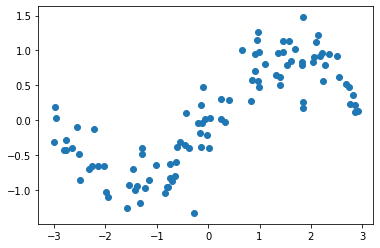

In [72]:
plt.scatter(X,y)

## 使用原始数据进行建模

In [73]:
# 需要对X的维度进行一些变换
X = X.reshape(-1,1)
X.shape

(100, 1)

In [74]:
# 测试数据的X坐标
sin_x = np.linspace(-3,3,1000).reshape(-1,1)

In [75]:
linearR = LinearRegression().fit(X,y)

In [76]:
treeR = DecisionTreeRegressor(random_state=0).fit(X,y)

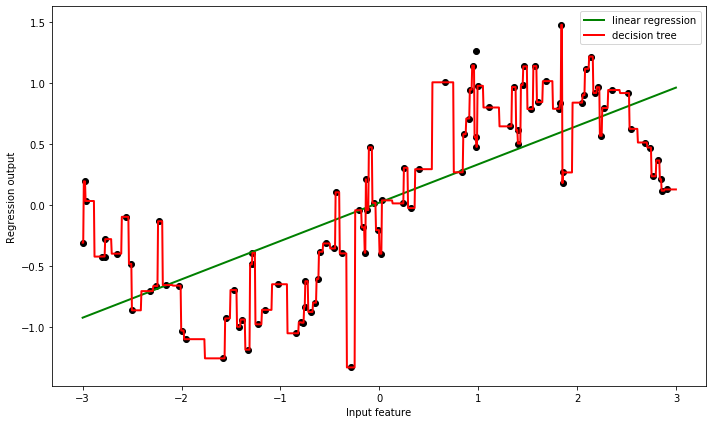

In [77]:
fig, ax1 = plt.subplots(figsize=(10,6))

# 绘制原始用于建模的点分布
ax1.scatter(X,y,c='k',marker='o')

# 绘制线性回归的拟合曲线
ax1.plot(sin_x, linearR.predict(sin_x),linewidth = 2, color='green',  label = 'linear regression')

# 绘制决策树的拟合曲线
ax1.plot(sin_x, treeR.predict(sin_x), linewidth = 2, color='red', label = 'decision tree')

ax1.legend(loc="best") 
ax1.set_ylabel("Regression output") 
ax1.set_xlabel("Input feature")

plt.tight_layout()

# 分箱处理

In [78]:
from sklearn.preprocessing import KBinsDiscretizer

分箱函数的练习

In [79]:
X_ = [[-2, 1, -4,   -1],
     [-1, 2, -3, -0.5],
     [ 0, 3, -2,  0.5],
     [ 1, 4, -1,    2]]

# strategy='uniform'表示等距分箱
est = KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='uniform')
est.fit(X_)

KBinsDiscretizer(encode='onehot-dense', n_bins=3, strategy='uniform')

In [80]:
X_bin = est.transform(X_)

In [81]:
X_bin.shape

(4, 12)

In [82]:
X_bin

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]])

In [83]:
#分箱的数量
est.n_bins

3

In [84]:
#每个特征的箱子边界
# 注意，这是一个嵌套数组
est.bin_edges_

array([array([-2., -1.,  0.,  1.]), array([1., 2., 3., 4.]),
       array([-4., -3., -2., -1.]), array([-1.,  0.,  1.,  2.])],
      dtype=object)

对上述模拟的余弦曲线的横坐标进行分箱处理

In [85]:
est = KBinsDiscretizer(n_bins=10, encode='onehot-dense', strategy='uniform')
X_bins = est.fit_transform(X)

In [86]:
X[:5,:]

array([[ 2.18255991],
       [-1.29056421],
       [-2.56046167],
       [ 1.57942323],
       [-0.28368565]])

In [87]:
X_bins[:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [88]:
X.shape

(100, 1)

In [89]:
X_bins.shape

(100, 10)

In [90]:
est.n_bins

10

In [91]:
est.bin_edges_

array([array([-2.99961903, -2.40870554, -1.81779206, -1.22687858, -0.6359651 ,
       -0.04505162,  0.54586186,  1.13677535,  1.72768883,  2.31860231,
        2.90951579])], dtype=object)

In [92]:
# 对预测的数据x轴也进行相同的分箱处理
sin_x_bin = est.transform(sin_x)

In [93]:
sin_x[:5,:]

array([[-3.        ],
       [-2.99399399],
       [-2.98798799],
       [-2.98198198],
       [-2.97597598]])

In [94]:
sin_x_bin[:5,:]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [95]:
#使用分箱后的数据训练模型
linearR_bin = LinearRegression().fit(X_bins, y)
treeR_bin = DecisionTreeRegressor().fit(X_bins,y)

绘制分箱后的情况

Text(0.5, 0, 'Input feature')

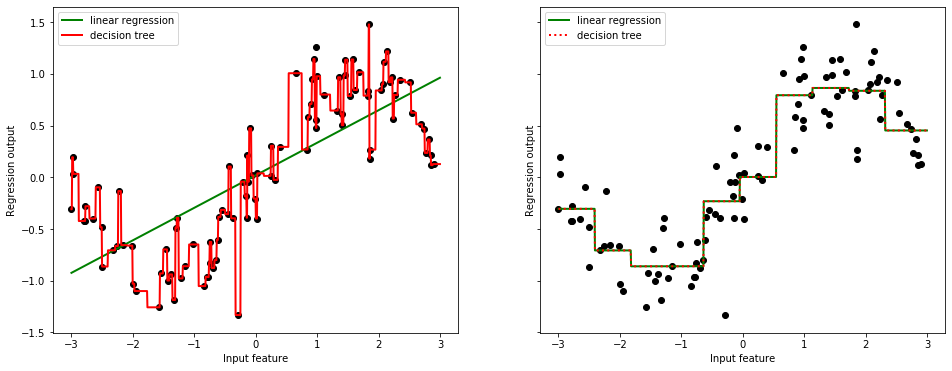

In [102]:
fig, (ax1, ax2) = plt.subplots(ncols=2,sharey=True, figsize=(16,6))

# 左边的图绘制原有的数据
# 绘制原始用于建模的点分布
ax1.scatter(X,y,c='k',marker='o')
# 绘制线性回归的拟合曲线
ax1.plot(sin_x, linearR.predict(sin_x),linewidth = 2, color='green',  label = 'linear regression')
# 绘制决策树的拟合曲线
ax1.plot(sin_x, treeR.predict(sin_x), linewidth = 2, color='red', label = 'decision tree')
ax1.legend(loc="best") 
ax1.set_ylabel("Regression output") 
ax1.set_xlabel("Input feature")

# 右边的图绘制分箱后的曲线
ax2.scatter(X,y,c='k',marker='o')
# 绘制线性回归的拟合曲线
ax2.plot(sin_x, linearR_bin.predict(sin_x_bin),linewidth = 2, color='green',linestyle='-', label = 'linear regression')
# 绘制决策树的拟合曲线
ax2.plot(sin_x, treeR_bin.predict(sin_x_bin), linewidth = 2,color='red',linestyle=':',label = 'decision tree')
ax2.legend(loc="best") 
ax2.set_ylabel("Regression output") 
ax2.set_xlabel("Input feature")